# LeR complete examples

* Please refer to the [documentation](https://ler.readthedocs.io/en/latest/) for more details.

## TOC:

* [Short lensed or unlensed BBH example with three detectors](https://ler.readthedocs.io/en/latest/examples/rates/LeR%20complete%20examples.html#Short-lensed-or-unlensed-BBH-example-with-three-detectors)
  * [Simulation of the GW CBC population (unlensed)](###bullet-one-one)
  * [Calculation of unlensed rates](###bullet-one-two)
  * [Simulation of the GW CBC population (lensed)](###bullet-one-three)
  * [Calculation of lensed rates](###bullet-one-four)
  * [Comparison of the rates](###bullet-one-five)
  * [Getting generated parameters](###bullet-one-six)
  * [Manually changing paramters and recompute the rates](###bullet-one-seven)
  * [Plot the generated parameters](###bullet-one-seven)

## Short lensed or unlensed BBH example with three detectors.

* This part of the notebook is a short example to simulate lensed and unlensed binary black hole mergers and calculate their rates ($yr^{-1}$) and finally compare the results.
  
* All the outputs are saved in the `ler_data` directory by default.

In [5]:
# import LeR
from ler import LeR # or from ler.rates import LeR
# initialize LeR
ler = LeR()


Initializing LeR class...


Initializing LensGalaxyParameterDistribution class...


Initializing OpticalDepth class

comoving_distance interpolator will be loaded from ./interpolator_json/comoving_distance/comoving_distance_0.json
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_0.json
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_0.json
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_0.json
using ler available velocity dispersion function : velocity_dispersion_ewoud
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion/velocity_dispersion_ewoud_0.json
using ler available axis_ratio function : axis_ratio_rayleigh
axis_ratio_rayleigh interpolator will be loaded from ./interpolator_json/a

In [3]:
# # print all initialization input arguments
# ler._print_all_init_args()

### Simulation of the GW CBC population (unlensed).
  
* by default 100,000 events will be sampled with batches of 50,000. For more realistic results, keep batch_size=50000 and size>=1000000.
  
* results will be saved in the `./ler_data` directory as json file.
  
* `resume=True` (default) will resume the simulation from the last saved batch. If you don't want to resume and create a new simulation, set `resume=False` .
  
* if you dont't need to save the file at the end of each batch sampling iteration (this will save a lot of time), set `save_batch=False` (default). The final results will be saved at the end of the simulation.

In [29]:
# ler.batch_size = 100000 # for faster computation
unlensed_param = ler.unlensed_cbc_statistics(size=100000, resume=True, save_batch=False)

unlensed params will be stored in ./ler_data/unlensed_param.json
resuming from ./ler_data/unlensed_param.json
unlensed parameters already sampled.


### Calculation of unlensed rates.

In [17]:
rate_unlensed, unlensed_param_detectable = ler.unlensed_rate()

Getting unlensed_param from json file ./ler_data/unlensed_param.json...
total unlensed rate (yr^-1): 286.1493411329775
number of simulated unlensed detectable events: 348
number of simulated all unlensed events: 100000
storing detectable params in ./ler_data/unlensed_param_detectable.json


In [18]:
# look for parameters names included in the generated data
print(unlensed_param_detectable.keys())

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'pdet_L1', 'pdet_H1', 'pdet_V1', 'pdet_net'])


In [26]:
# # ----------------
# # Quick Pots
# # ----------------

# import corner
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.lines as mlines

# param_names = ['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source']

# # Prepare data for corner plot
# samples_unlensed = np.stack([unlensed_param[p] for p in param_names], axis=1)
# samples_detectable = np.stack([unlensed_param_detectable[p] for p in param_names], axis=1)

# # Generate corner plot
# fig = corner.corner(
#     samples_unlensed, 
#     labels=param_names, 
#     color='C0', 
#     alpha=0.5,
#     plot_density=False, plot_datapoints=False, smooth=0.8,
#     hist_kwargs={'density': True}
# )
# blue_line = mlines.Line2D([], [], color='C0', label='unlensed')

# # Make sure you have signifcant detectable events
# corner.corner(
#     samples_detectable, 
#     labels=param_names, 
#     color='C1', 
#     alpha=0.5,
#     fig=fig, 
#     plot_density=False, plot_datapoints=False, smooth=0.8,
#     hist_kwargs={'density': True}
# )
# orange_line = mlines.Line2D([], [], color='C1', label='unlensed detectable')

# # Add legend
# fig.legend(handles=[blue_line, 
# orange_line
# ], loc='upper right', bbox_to_anchor=(0.95, 0.95), fontsize=14)

# plt.show()

### Simulation of the GW CBC population (lensed). <a class="anchor" id="bullet-one-three"></a> 

* this will generate a json file with the simulated source parameters, lensed parameters and image parameters.
  
* if the program hangs dues to memory issues,
  * try reducing the batch size.
  * and you can resume from the last saved batch. But you need to set save_batch=True.
  * `save_batch=False` (default) will make the code run faster but you will not have the results saved in the end of each batch.

In [28]:
# ler.batch_size = 50000
lensed_param = ler.lensed_cbc_statistics(size=100000, resume=True, save_batch=False)

lensed params will be store in ./ler_data/lensed_param.json
resuming from ./ler_data/lensed_param.json
lensed parameters already sampled.


### Calculation of lensed rates. <a class="anchor" id="bullet-one-four"></a> 

In [27]:
rate_lensed, lensed_param_detectable = ler.lensed_rate();

Getting lensed_param from json file ./ler_data/lensed_param.json...
total lensed rate (yr^-1): 0.07774635892038481
number of simulated lensed detectable events: 76
number of simulated all lensed events: 100000
storing detectable params in ./ler_data/lensed_param_detectable.json


In [13]:
print(lensed_param_detectable.keys())

dict_keys(['zl', 'zs', 'sigma', 'theta_E', 'q', 'phi', 'gamma', 'gamma1', 'gamma2', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'x_source', 'y_source', 'effective_luminosity_distance', 'effective_geocent_time', 'effective_phase', 'pdet_net', 'L1', 'H1', 'V1'])


In [31]:
# # ----------------
# # Quick Pots
# # ----------------

# import corner
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.lines as mlines

# param_names = ['zl', 'zs', 'sigma', 'theta_E', 'q', 'phi', 'gamma', 'gamma1', 'gamma2']

# # Prepare data for corner plot
# samples_unlensed = np.stack([lensed_param[p] for p in param_names], axis=1)
# samples_detectable = np.stack([lensed_param_detectable[p] for p in param_names], axis=1)

# # Generate corner plot
# fig = corner.corner(
#     samples_unlensed, 
#     labels=param_names, 
#     color='C0', 
#     alpha=0.5,
#     plot_density=False, plot_datapoints=False, smooth=0.8,
#     hist_kwargs={'density': True}
# )
# blue_line = mlines.Line2D([], [], color='C0', label='unlensed')

# # Make sure you have signifcant detectable events
# corner.corner(
#     samples_detectable, 
#     labels=param_names, 
#     color='C1', 
#     alpha=0.5,
#     fig=fig, 
#     plot_density=False, plot_datapoints=False, smooth=0.8,
#     hist_kwargs={'density': True}
# )
# orange_line = mlines.Line2D([], [], color='C1', label='unlensed detectable')

# # Add legend
# fig.legend(handles=[blue_line, 
# orange_line
# ], loc='upper right', bbox_to_anchor=(0.95, 0.95), fontsize=14)

# plt.show()

### Comparison of the rates. <a class="anchor" id="bullet-one-five"></a> 

* `ler.rate_ratio` function by default assumes data generated and stored in previous steps. Otherwise you have to provide the data or the file path.

In [11]:
ler.rate_ratio();

unlensed_rate: 309.99511956072564
lensed_rate: 0.07774635892038481
ratio: 3987.262218648365


* if you want to calculate the rates, and compare it at the same time, run the following command.

    ```rate_ratio, unlensed_param_detectable, lensed_param_detectable =ler.rate_comparison_with_rate_calculation()```

* Note: The above example is for spin-less systems. IMRPhenomD (spin-less) is the default waveform approximant. To see LeR configuration, run

    ```ler.print_all_params()```

### Getting generated parameters. <a class="anchor" id="bullet-one-six"></a> 

* what are the saved files?

* all saved files are in the `ler_data` directory by default.

In [21]:
#ler.json_file_names, ler.ler_directory
print(f"ler directory: {ler.ler_directory}")
print(f"ler json file names: {ler.json_file_names}")

ler directory: ./ler_data
ler json file names: {'ler_params': 'ler_params.json', 'unlensed_param': 'unlensed_param.json', 'unlensed_param_detectable': 'unlensed_param_detectable.json', 'lensed_param': 'lensed_param.json', 'lensed_param_detectable': 'lensed_param_detectable.json'}


* you can use ler attributes or call the relevant json file

In [5]:
# the generated parameters are not store in the ler instance, but in the json files
# you can access the generated parameters from the json files as shown below
unlensed_param_detectable = ler.unlensed_param_detectable
lensed_param_detectable = ler.lensed_param_detectable
# unlensed_param = ler.unlensed_param
# lensed_param = ler.lensed_param

# print keys of the generated parameters
print(f"unlensed_param_detectable keys: {unlensed_param_detectable.keys()}")
print(f"lensed_param_detectable keys: {lensed_param_detectable.keys()}")

unlensed_param_detectable keys: dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'pdet_L1', 'pdet_H1', 'pdet_V1', 'pdet_net'])
lensed_param_detectable keys: dict_keys(['zl', 'zs', 'sigma', 'theta_E', 'q', 'phi', 'gamma', 'gamma1', 'gamma2', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'x_source', 'y_source', 'effective_luminosity_distance', 'effective_geocent_time', 'effective_phase', 'pdet_net', 'L1', 'H1', 'V1'])


* here is another way to access the generated parameters from the json files

* `get_param_from_json` and `load_json` functions from `ler.utils` sub-module will be use in the following examples. `get_param_from_json` will automatically assume the dictionary value is a list and will be converted to a numpy array, while `load_json` will return the json file's dictionary as it is.

In [6]:
from ler.utils import get_param_from_json

unlensed_param_detectable = get_param_from_json(ler.ler_directory+'/'+ler.json_file_names['unlensed_param_detectable'])
lensed_param_detectable = get_param_from_json(ler.ler_directory+'/'+ler.json_file_names['lensed_param_detectable'])
# unlensed_param = get_param_from_json(ler.ler_directory+'/'+ler.json_file_names['unlensed_param'])
# lensed_param = get_param_from_json(ler.ler_directory+'/'+ler.json_file_names['lensed_param'])

# print keys of the generated parameters
print(f"unlensed_param_detectable keys: {unlensed_param_detectable.keys()}")
print(f"lensed_param_detectable keys: {lensed_param_detectable.keys()}")

unlensed_param_detectable keys: dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'pdet_L1', 'pdet_H1', 'pdet_V1', 'pdet_net'])
lensed_param_detectable keys: dict_keys(['zl', 'zs', 'sigma', 'theta_E', 'q', 'phi', 'gamma', 'gamma1', 'gamma2', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'x_source', 'y_source', 'effective_luminosity_distance', 'effective_geocent_time', 'effective_phase', 'pdet_net', 'L1', 'H1', 'V1'])


* Note: all LeR initialization parameters and some important results are saved in a json file.

In [12]:
from ler.utils import load_json
# ler_params = load_json(ler.ler_directory+"/"+ler.json_file_names["ler_params"])
ler_params = load_json('ler_data/ler_params.json')
print(ler_params.keys())
print("detectable_unlensed_rate_per_year: ", ler_params['detectable_unlensed_rate_per_year'])
print("detectable_lensed_rate_per_year; ",ler_params['detectable_lensed_rate_per_year'])
print("rate_ratio: ",ler_params['rate_ratio'])

dict_keys(['npool', 'z_min', 'z_max', 'cosmology', 'lens_type', 'lens_functions', 'lens_functions_params', 'lens_param_samplers', 'lens_param_samplers_params', 'directory', 'create_new_interpolator', 'n_min_images', 'n_max_images', 'time_window', 'lens_model_list', 'event_type', 'source_priors', 'source_priors_params', 'spin_zero', 'spin_precession', 'pdet_args', 'list_of_detectors', 'detectable_unlensed_rate_per_year', 'pdet_type_unlensed', 'detectable_lensed_rate_per_year', 'pdet_type_lensed', 'rate_ratio'])
detectable_unlensed_rate_per_year:  309.99511956072564
detectable_lensed_rate_per_year;  0.07774635892038481
rate_ratio:  3987.262218648365


### Looking at internally defined important functions and it's parameters

In [12]:
# List all available GW prior are in ler.available_gw_prior_list_and_its_params 
print("GW prior sampler functions and it's input arguments:\n")
for key, value in ler.available_gw_prior_list_and_its_params.items():
    print(f"{key} = dict(")
    if isinstance(value, dict):
        for k, v in value.items():
            print(f"    {k} = {v},")
    else:
        print(f"    {value},")
    print(")")

# list all available lens prior are in ler.available_lens_prior_list_and_its_params
print("Lens prior sampler functions and it's input arguments:\n")
for key, value in ler.available_lens_prior_list_and_its_params.items():
    print(f"{key} = dict(")
    if isinstance(value, dict):
        for k, v in value.items():
            print(f"    {k} = {v},")
    else:
        print(f"    {value},")
    print(")")

# list all available lens functions are in ler.available_lens_functions_and_its_params
print("Other lens related functions and it's input arguments:\n")
for key, value in ler.available_lens_functions_and_its_params.items():
    print(f"{key} = dict(")
    if isinstance(value, dict):
        for k, v in value.items():
            print(f"    {k} = {v},")
    else:
        print(f"    {value},")
    print(")")

GW prior sampler functions and it's input arguments:

merger_rate_density = dict(
    merger_rate_density_bbh_popI_II_oguri2018 = {'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.1, 'b4': 30},
    sfr_madau_fragos2017 = {'a': 0.01, 'b': 2.6, 'c': 3.2, 'd': 6.2},
    sfr_madau_dickinson2014 = {'a': 0.015, 'b': 2.7, 'c': 2.9, 'd': 5.6},
    sfr_with_td = {'R0': 2.39e-08, 'a': 0.01, 'b': 2.6, 'c': 3.2, 'd': 6.2, 'td_min': 0.01, 'td_max': 10.0},
    merger_rate_density_bbh_popIII_ken2022 = {'n0': 1.92e-08, 'aIII': 0.66, 'bIII': 0.3, 'zIII': 11.6},
    merger_rate_density_bbh_primordial_ken2022 = {'n0': 4.4e-11, 't0': 13.786885302009708},
    sfr_madau_fragos2017_with_bbh_dt = {'R0': 2.39e-08},
    sfr_madau_dickinson2014_with_bbh_dt = {'R0': 2.39e-08},
    sfr_madau_fragos2017_with_bns_dt = {'R0': 1.0550000000000001e-07},
    sfr_madau_dickinson2014_with_bns_dt = {'R0': 1.0550000000000001e-07},
)
zs = dict(
    source_redshift = None,
)
source_frame_masses = dict(
    binary_masses_BBH_popI_II_powerlaw

### KDE plots for the simulated parameters 

* Below I plot the generated redshift distributions of the lensed and unlensed populations and comapre them.

getting gw_params from json file ler_data/unlensed_param_detectable.json...
getting gw_params from json file ler_data/unlensed_param.json...
getting gw_params from json file ler_data/lensed_param_detectable.json...
getting gw_params from json file ler_data/lensed_param.json...


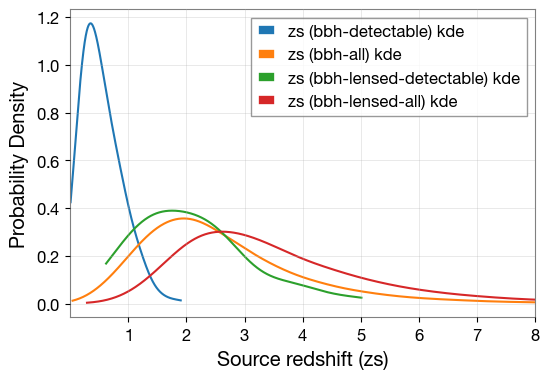

In [4]:
# quick plot
import matplotlib.pyplot as plt
from ler.utils import plots as lerplt

# plotting the distribution of event parameters
# comparision of redshift distribution for lensed and unlensed events
# param_dict can be either a dictionary or a json file name that contains the parameters
plt.figure(figsize=(6, 4))
# for unlensed case
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/unlensed_param_detectable.json',
    plot_label='zs (bbh-detectable)',
    histogram=False,
    kde=True,
    kde_bandwidth=0.5,
)
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/unlensed_param.json',
    plot_label='zs (bbh-all)',
    histogram=False,
    kde=True,
)
# for lensed case
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/lensed_param_detectable.json',
    plot_label='zs (bbh-lensed-detectable)',
    histogram=False,
    kde=True,
    kde_bandwidth=0.5,
)
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/lensed_param.json',
    plot_label='zs (bbh-lensed-all)',
    histogram=False,
    kde=True,
)
plt.xlim(0.001,8)
plt.grid(alpha=0.4)
plt.xlabel('Source redshift (zs)')
plt.ylabel('Probability Density')
plt.show()